In [47]:
#import dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np

# chisom
import hvplot.pandas
import requests
import warnings

from sklearn import datasets
# from datetime import date
import datetime as dt

# store filepaths into variable
results_csv = pd.read_csv('Resources/results.csv', na_values=r'\N')
lap_times_csv = pd.read_csv('Resources/lap_times.csv', na_values=r'\N')
races_csv = pd.read_csv('Resources/races.csv', na_values=r'\N')
constructors_csv = pd.read_csv('Resources/constructors.csv', na_values=r'\N')
constructor_results = pd.read_csv('Resources/constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv('Resources/constructor_standings.csv', na_values=r'\N')
drivers_csv = pd.read_csv('Resources/drivers.csv', na_values=r'\N')
drivers_standings_csv = pd.read_csv('Resources/driver_standings.csv', na_values=r'\N')
circuits_csv = pd.read_csv('Resources/circuits.csv', na_values=r'\N')
pit_stop = pd.read_csv('Resources/pit_stops.csv', na_values=r'\N')

In [15]:
#merge constructor results and constructor standings csv
constructor_df = pd.merge(constructor_results, constructor_standings, how="inner")
constructor_df


,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins
0,1,18,1,14.0,NaN,1,1,1,1
1,2,18,2,8.0,NaN,2,3,3,0
2,3,18,3,9.0,NaN,3,2,2,0
3,4,18,4,5.0,NaN,4,4,4,0
4,5,18,5,2.0,NaN,5,5,5,0
...,...,...,...,...,...,...,...,...,...
3796,16685,1099,210,1.0,NaN,28441,7,7,0
3797,16686,1099,213,0.0,NaN,28440,9,9,0
3798,16688,1099,1,0.0,NaN,28442,10,10,0
3799,16693,1100,1,12.0,NaN,28452,5,5,0


In [16]:
#merge the combined construtors with the constructors csv
constructor_df = pd.merge(constructor_df, constructors_csv, how="inner")
constructor_df

,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,NaN,1,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,186,36,1,14.0,D,25734,11,E,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,374,53,1,10.0,NaN,6319,2,2,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,574,71,1,4.0,NaN,27947,5,5,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,762,90,1,1.0,NaN,6142,5,5,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16696,1100,213,1.0,NaN,28450,9,9,0,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
3797,16237,1052,214,0.0,NaN,27680,8,8,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
3798,16247,1053,214,3.0,NaN,27710,7,7,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
3799,16454,1074,214,8.0,NaN,28137,5,5,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [17]:
#drop extra columns and combine the merged constructors with races csv on "raceId"

new_constructor_df_constructor= constructor_df.drop(columns=["status", "positionText", "constructorRef"])
new_constructor_df = pd.merge(constructor_df, races_csv, on="raceId")
new_constructor_df

,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins,constructorRef,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,14.0,NaN,1,1,1,1,mclaren,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,8.0,NaN,2,3,3,0,bmw_sauber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,9.0,NaN,3,2,2,0,williams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,5.0,NaN,4,4,4,0,renault,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,2.0,NaN,5,5,5,0,toro_rosso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,NaN,27892,10,10,0,haas,...,2021-11-05,NaN,2021-11-05,NaN,2021-11-06,NaN,2021-11-06,NaN,NaN,NaN
3797,16419,1071,210,0.0,NaN,27902,10,10,0,haas,...,2021-11-12,NaN,2021-11-13,NaN,NaN,NaN,2021-11-12,NaN,2021-11-13,NaN
3798,16428,1051,210,0.0,NaN,27912,10,10,0,haas,...,2021-11-19,NaN,2021-11-19,NaN,2021-11-20,NaN,2021-11-20,NaN,NaN,NaN
3799,16439,1072,210,0.0,NaN,27922,10,10,0,haas,...,2021-12-03,NaN,2021-12-03,NaN,2021-12-04,NaN,2021-12-04,NaN,NaN,NaN


In [18]:
#dropping extra columns again after last merge
clean_construtors= new_constructor_df.drop(columns=["fp1_date", "fp1_time", "fp2_date",	"fp2_time", "fp3_date", "fp3_time","quali_date","quali_time","sprint_date", "sprint_time","date","time", "url_x", "url_y", "status","positionText"])
clean_construtors

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,name_x,nationality,year,round,circuitId,name_y
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
1,2,18,2,8.0,2,3,0,bmw_sauber,BMW Sauber,German,2008,1,1,Australian Grand Prix
2,3,18,3,9.0,3,2,0,williams,Williams,British,2008,1,1,Australian Grand Prix
3,4,18,4,5.0,4,4,0,renault,Renault,French,2008,1,1,Australian Grand Prix
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,2008,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,27892,10,0,haas,Haas F1 Team,American,2021,18,32,Mexico City Grand Prix
3797,16419,1071,210,0.0,27902,10,0,haas,Haas F1 Team,American,2021,19,18,São Paulo Grand Prix
3798,16428,1051,210,0.0,27912,10,0,haas,Haas F1 Team,American,2021,20,78,Qatar Grand Prix
3799,16439,1072,210,0.0,27922,10,0,haas,Haas F1 Team,American,2021,21,77,Saudi Arabian Grand Prix


In [19]:
#rename columns
clean_construtors = clean_construtors.rename(columns={"name_x":"constructor_name", "name_y":"circuit name"})
clean_construtors

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
1,2,18,2,8.0,2,3,0,bmw_sauber,BMW Sauber,German,2008,1,1,Australian Grand Prix
2,3,18,3,9.0,3,2,0,williams,Williams,British,2008,1,1,Australian Grand Prix
3,4,18,4,5.0,4,4,0,renault,Renault,French,2008,1,1,Australian Grand Prix
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,2008,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,27892,10,0,haas,Haas F1 Team,American,2021,18,32,Mexico City Grand Prix
3797,16419,1071,210,0.0,27902,10,0,haas,Haas F1 Team,American,2021,19,18,São Paulo Grand Prix
3798,16428,1051,210,0.0,27912,10,0,haas,Haas F1 Team,American,2021,20,78,Qatar Grand Prix
3799,16439,1072,210,0.0,27922,10,0,haas,Haas F1 Team,American,2021,21,77,Saudi Arabian Grand Prix


In [21]:
#find winning constructors from 2004

constructors_after_2004 = clean_construtors[(clean_construtors["year"]) >=2004]
constructors_after_2004 = constructors_after_2004.sort_values("year", ascending=True)
constructors_after_2004

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
45,766,90,17,0.0,6146,9,0,jordan,Jordan,Irish,2004,1,1,Australian Grand Prix
44,761,90,16,3.0,6141,4,0,bar,BAR,British,2004,1,1,Australian Grand Prix
43,763,90,15,0.0,6143,6,0,sauber,Sauber,Swiss,2004,1,1,Australian Grand Prix
42,765,90,7,0.0,6145,8,0,toyota,Toyota,Japanese,2004,1,1,Australian Grand Prix
41,758,90,6,18.0,6138,1,1,ferrari,Ferrari,Italian,2004,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,16686,1099,213,0.0,28440,9,0,alphatauri,AlphaTauri,Italian,2023,2,77,Saudi Arabian Grand Prix
687,16693,1100,1,12.0,28452,5,0,mclaren,McLaren,British,2023,3,1,Australian Grand Prix
688,16696,1100,213,1.0,28450,9,0,alphatauri,AlphaTauri,Italian,2023,3,1,Australian Grand Prix
674,16679,1098,1,0.0,28492,10,0,mclaren,McLaren,British,2023,1,3,Bahrain Grand Prix


In [22]:
top_winning_constructors = constructors_after_2004[constructors_after_2004["position"]==1].groupby(["constructorId", "constructor_name","nationality"])
top_winning_constructors.head()

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
41,758,90,6,18.0,6138,1,1,ferrari,Ferrari,Italian,2004,1,1,Australian Grand Prix
30,570,71,4,16.0,27943,1,1,renault,Renault,French,2005,1,1,Australian Grand Prix
20,372,53,4,10.0,6317,1,1,renault,Renault,French,2006,1,3,Bahrain Grand Prix
11,185,36,6,13.0,25733,1,1,ferrari,Ferrari,Italian,2007,1,1,Australian Grand Prix
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
702,3823,1,23,18.0,4038,1,1,brawn,Brawn,British,2009,1,1,Australian Grand Prix
507,13900,337,6,43.0,24232,1,1,ferrari,Ferrari,Italian,2010,1,3,Bahrain Grand Prix
520,14129,841,9,35.0,24660,1,1,red_bull,Red Bull,Austrian,2011,1,1,Australian Grand Prix
525,14356,860,1,40.0,24932,1,1,mclaren,McLaren,British,2012,1,1,Australian Grand Prix
539,14597,880,6,30.0,25136,1,0,ferrari,Ferrari,Italian,2013,1,1,Australian Grand Prix


In [24]:
#calculate win counts for each year 
win_counts = top_winning_constructors['wins'].sum().reset_index()
win_counts.value_counts()


constructorId  constructor_name  nationality  wins
1              McLaren           British      2       1
4              Renault           French       2       1
6              Ferrari           Italian      6       1
9              Red Bull          Austrian     2       1
23             Brawn             British      1       1
131            Mercedes          German       5       1
dtype: int64

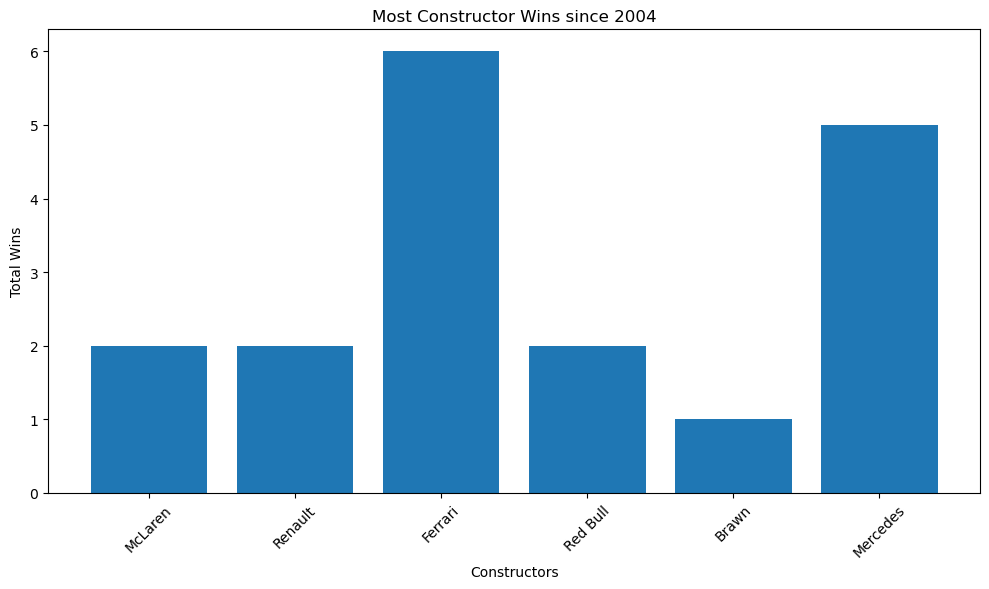

In [25]:
# Create a bar chart for top constructors per year from 2004
plt.figure(figsize=(10, 6))
plt.bar(win_counts['constructor_name'], win_counts['wins'])
plt.xlabel('Constructors')
plt.ylabel('Total Wins')
plt.title('Most Constructor Wins since 2004')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

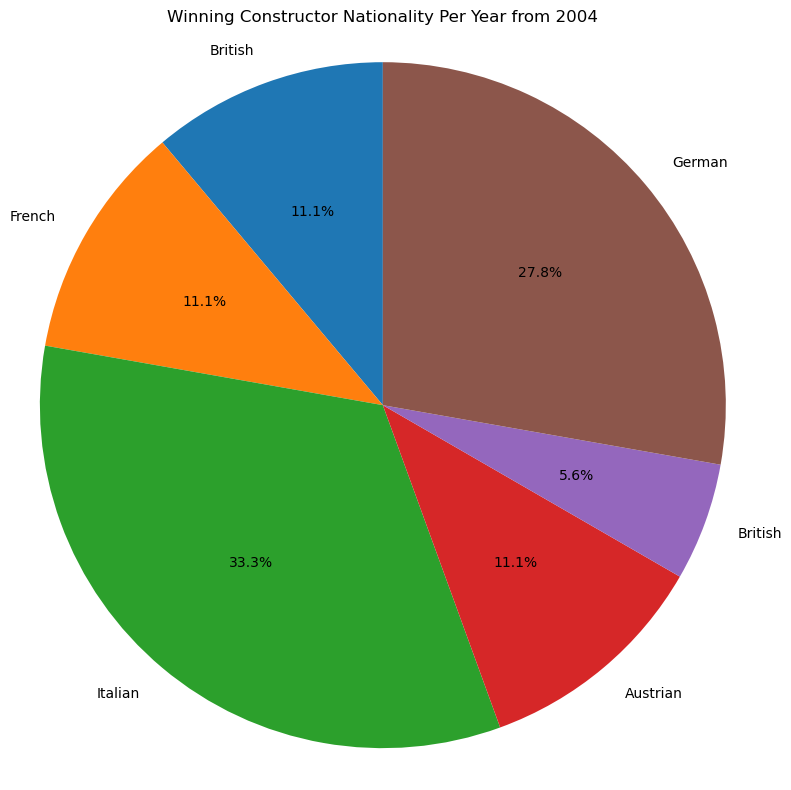

In [28]:
# Create a pie chart for top constructors per year based on nationality
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(win_counts['wins'], labels=win_counts['nationality'], autopct='%1.1f%%', startangle=90)

ax.set_title('Winning Constructor Nationality Per Year from 2004')

plt.axis('equal')  

plt.tight_layout()
plt.show()

In [ ]:
#based on the data, the top 3 most successful constructors are Ferrari, Redbull and Mercedes. Ferarri has been the most successful constructor for f1 in the last 20 years. There can be many factors: such as investment of resources, technical innovation and talent recruitment. Italian made cars serve as a blueprint for success for team managers starting a team in F1. 

In [48]:
races_df=pd.DataFrame(races_csv, columns=[
                        "year", "raceId", "date"])
races_df

,year,raceId,date
0,2009,1,2009-03-29
1,2009,2,2009-04-05
2,2009,3,2009-04-19
3,2009,4,2009-04-26
4,2009,5,2009-05-10
...,...,...,...
1096,2023,1116,2023-10-22
1097,2023,1117,2023-10-29
1098,2023,1118,2023-11-05
1099,2023,1119,2023-11-19


In [49]:
results_df=pd.DataFrame(results_csv, columns=[
                        "raceId", "driverId"])
results_df

,raceId,driverId
0,18,1
1,18,2
2,18,3
3,18,4
4,18,5
...,...,...
26075,1110,817
26076,1110,858
26077,1110,807
26078,1110,832


In [50]:
drivers_df=pd.DataFrame(drivers_csv, columns=[
                        "dob", "driverRef", "driverId"])
drivers_df

,dob,driverRef,driverId
0,1985-01-07,hamilton,1
1,1977-05-10,heidfeld,2
2,1985-06-27,rosberg,3
3,1981-07-29,alonso,4
4,1981-10-19,kovalainen,5
...,...,...,...
852,1999-03-22,mick_schumacher,854
853,1999-05-30,zhou,855
854,1995-02-06,de_vries,856
855,2001-04-06,piastri,857


In [51]:
drivers_standings_df=pd.DataFrame(drivers_standings_csv, columns=[
                        "wins", "driverId", "raceId"])
drivers_standings_df

,wins,driverId,raceId
0,1,1,18
1,0,2,18
2,0,3,18
3,0,4,18
4,0,5,18
...,...,...,...
34119,0,846,1110
34120,0,839,1110
34121,0,844,1110
34122,0,857,1110


In [52]:
driver_merged=pd.merge(drivers_df, drivers_standings_df,  on="driverId")

In [53]:
driver_merged=pd.merge(drivers_df, drivers_standings_df,  on="driverId")
driver_merged_clean= driver_merged.dropna()
driver_merged_clean.head()

,dob,driverRef,driverId,wins,raceId
0,1985-01-07,hamilton,1,1,18
1,1985-01-07,hamilton,1,1,19
2,1985-01-07,hamilton,1,1,20
3,1985-01-07,hamilton,1,1,21
4,1985-01-07,hamilton,1,1,22


In [54]:
driver_merged_clean=pd.merge(driver_merged_clean, races_df, on="raceId")
driver_merged_clean


,dob,driverRef,driverId,wins,raceId,year,date
0,1985-01-07,hamilton,1,1,18,2008,2008-03-16
1,1977-05-10,heidfeld,2,0,18,2008,2008-03-16
2,1985-06-27,rosberg,3,0,18,2008,2008-03-16
3,1981-07-29,alonso,4,0,18,2008,2008-03-16
4,1981-10-19,kovalainen,5,0,18,2008,2008-03-16
...,...,...,...,...,...,...,...
34119,1898-06-09,fagioli,786,0,833,1950,1950-05-13
34120,1906-07-06,harrison,787,0,833,1950,1950-05-13
34121,1915-10-26,fry,788,0,833,1950,1950-05-13
34122,1915-03-24,martin,789,0,833,1950,1950-05-13


In [55]:
driver_name = driver_merged_clean.set_index('driverRef').groupby(['driverRef'])
driver_name.head()
after_2004_races_df = driver_merged_clean[(driver_merged_clean['date']) > '2004-01-01']
after_2004_races_df= after_2004_races_df.sort_values('year', ascending=True)
after_2004_races_df

,dob,driverRef,driverId,wins,raceId,year,date
9793,1981-01-01,baumgartner,47,0,91,2004,2004-03-21
8104,1975-09-20,montoya,31,0,98,2004,2004-06-20
8105,1983-02-07,klien,32,0,98,2004,2004-06-20
8106,1973-09-19,matta,43,0,98,2004,2004-06-20
8107,1966-09-02,panis,44,0,98,2004,2004-06-20
...,...,...,...,...,...,...,...
6963,1997-09-30,max_verstappen,830,3,1102,2023,2023-05-07
6964,1994-09-01,sainz,832,0,1102,2023,2023-05-07
6965,1996-09-17,ocon,839,0,1102,2023,2023-05-07
6936,1985-01-07,hamilton,1,0,1101,2023,2023-04-30


In [56]:
after_2004_races_df.count()

dob          8411
driverRef    8411
driverId     8411
wins         8411
raceId       8411
year         8411
date         8411
dtype: int64

In [57]:
after_2004_races_df["dob"] = pd.to_datetime(after_2004_races_df["dob"])

# Extract the year from the date of birth
after_2004_races_df["dob_year"] = after_2004_races_df["dob"].dt.year

# Calculate the age at the time of the race in years
after_2004_races_df["age"] = after_2004_races_df["year"] - after_2004_races_df["dob_year"]

# Drop the temporary 'dob_year' column if you no longer need it
after_2004_races_df = after_2004_races_df.drop(columns=["dob_year"])
after_2004_races_df

,dob,driverRef,driverId,wins,raceId,year,date,age
9793,1981-01-01,baumgartner,47,0,91,2004,2004-03-21,23
8104,1975-09-20,montoya,31,0,98,2004,2004-06-20,29
8105,1983-02-07,klien,32,0,98,2004,2004-06-20,21
8106,1973-09-19,matta,43,0,98,2004,2004-06-20,31
8107,1966-09-02,panis,44,0,98,2004,2004-06-20,38
...,...,...,...,...,...,...,...,...
6963,1997-09-30,max_verstappen,830,3,1102,2023,2023-05-07,26
6964,1994-09-01,sainz,832,0,1102,2023,2023-05-07,29
6965,1996-09-17,ocon,839,0,1102,2023,2023-05-07,27
6936,1985-01-07,hamilton,1,0,1101,2023,2023-04-30,38


In [58]:
reduce_driver_merged_group = after_2004_races_df[(after_2004_races_df["age"] < 60)]
reduce_driver_merged_group .head()

#explain why 60 was the cut off mark
#the cut off mark for the age was based on the retirement age in the united states, most career focused job have s retirment age bewteen 50-65 years and i believe having a cut off age at 60 was a good benchamrk 

,dob,driverRef,driverId,wins,raceId,year,date,age
9793,1981-01-01,baumgartner,47,0,91,2004,2004-03-21,23
8104,1975-09-20,montoya,31,0,98,2004,2004-06-20,29
8105,1983-02-07,klien,32,0,98,2004,2004-06-20,21
8106,1973-09-19,matta,43,0,98,2004,2004-06-20,31
8107,1966-09-02,panis,44,0,98,2004,2004-06-20,38


In [59]:
reduce_driver_merged_group.count()

dob          8411
driverRef    8411
driverId     8411
wins         8411
raceId       8411
year         8411
date         8411
age          8411
dtype: int64

In [60]:
driver_merged_group2=reduce_driver_merged_group.groupby(["wins"]).max()
driver_merged_group2.tail()

,dob,driverRef,driverId,raceId,year,date,age
wins,,,,,,,
11,1997-09-30,vettel,830,1091,2022,2022-10-02,35
12,1997-09-30,vettel,830,1092,2022,2022-10-09,35
13,1997-09-30,vettel,830,1093,2022,2022-10-23,35
14,1997-09-30,max_verstappen,830,1095,2022,2022-11-13,25
15,1997-09-30,max_verstappen,830,1096,2022,2022-11-20,25


In [61]:
driver_merged_group2_aver=reduce_driver_merged_group['age'].mean()
driver_merged_group2_aver
#thois result shiws that the average age bewteen all drivers regardless of the amount of wins is 28 years old 

28.055879205801926

In [62]:
driver_merged_group2_avera=reduce_driver_merged_group['wins'].mean()
driver_merged_group2_avera

0.4528593508500773

In [63]:
age_group= reduce_driver_merged_group.groupby(["age"])
age_group.head()


,dob,driverRef,driverId,wins,raceId,year,date,age
9793,1981-01-01,baumgartner,47,0,91,2004,2004-03-21,23
8104,1975-09-20,montoya,31,0,98,2004,2004-06-20,29
8105,1983-02-07,klien,32,0,98,2004,2004-06-20,21
8106,1973-09-19,matta,43,0,98,2004,2004-06-20,31
8107,1966-09-02,panis,44,0,98,2004,2004-06-20,38
...,...,...,...,...,...,...,...,...
3700,1997-09-30,max_verstappen,830,0,939,2015,2015-09-20,18
3722,1997-09-30,max_verstappen,830,0,940,2015,2015-09-27,18
3658,1997-09-30,max_verstappen,830,0,937,2015,2015-08-23,18
3679,1997-09-30,max_verstappen,830,0,938,2015,2015-09-06,18


In [64]:
top4_wins=reduce_driver_merged_group.loc[reduce_driver_merged_group['wins']>=10]
top4_wins
#explain why you use 12 as a benchmark
#Looking at the top 4 winners, i needed a benchmark to see what age the drivers won. Looking at 10 wins seem the more reasonable because the most wins should be drivers that have double digts wins, with the amount of race held yearly and the amount ciructs done during the year.

,dob,driverRef,driverId,wins,raceId,year,date,age
8168,1969-01-03,michael_schumacher,30,11,101,2004,2004-07-25,35
8146,1969-01-03,michael_schumacher,30,10,100,2004,2004-07-11,35
8287,1969-01-03,michael_schumacher,30,13,106,2004,2004-10-10,35
8312,1969-01-03,michael_schumacher,30,13,107,2004,2004-10-24,35
8214,1969-01-03,michael_schumacher,30,12,103,2004,2004-08-29,35
8191,1969-01-03,michael_schumacher,30,12,102,2004,2004-08-15,35
8262,1969-01-03,michael_schumacher,30,12,105,2004,2004-09-26,35
8238,1969-01-03,michael_schumacher,30,12,104,2004,2004-09-12,35
2054,1987-07-03,vettel,20,11,858,2011,2011-11-13,24
2082,1987-07-03,vettel,20,11,859,2011,2011-11-27,24


In [65]:
top4_wins_group= top4_wins.groupby(["driverRef"])
top4_wins_group

In [66]:
top4_wins_aver=top4_wins_group['age'].mean()
top4_wins_aver

driverRef
hamilton              32.222222
max_verstappen        25.000000
michael_schumacher    35.000000
vettel                25.000000
Name: age, dtype: float64

In [67]:
age_groups=reduce_driver_merged_group.groupby(["age"]).max()

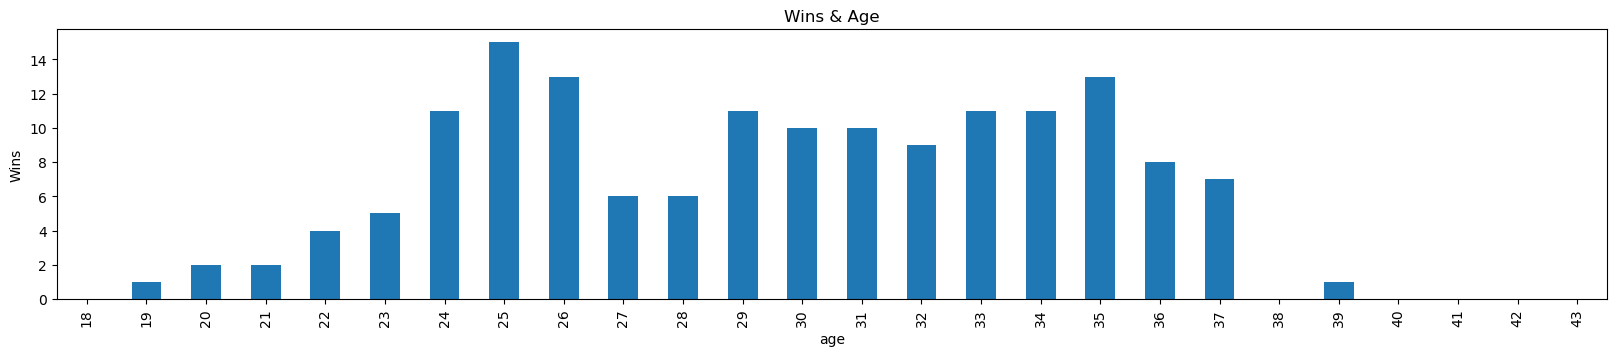

In [68]:
age_of_driver_graph= age_groups['wins']
age_of_driver_graph.plot(kind="bar", figsize=(20,3.5))
plt.xlabel("age")
plt.ylabel("Wins")
plt.title("Wins & Age")
plt.show()

In [69]:
winss= reduce_driver_merged_group['wins']
age = reduce_driver_merged_group['age']
st.pearsonr(reduce_driver_merged_group['age'],reduce_driver_merged_group['wins'])
print(f"The correlation coefficient between wins and age is {round(st.pearsonr(winss, age)[0],2)}")
#explain how there is no correlation between the age and wins 
#the correlation shown proves that there is a signficant but not enough signficance for the age of a driver to be taken into account when looking at the fsctors that play into whether or not a head coach should hire an young driver or someone of an older age.

The correlation coefficient between wins and age is 0.06


In [70]:
x_values = reduce_driver_merged_group['age']
y_values = reduce_driver_merged_group['wins']
linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.003047111200028664


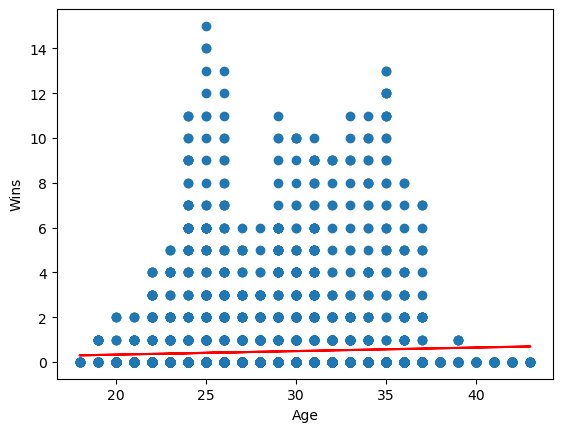

In [71]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Age')
plt.ylabel('Wins')
print(f"The r-squared is: {rvalue**2}")
plt.show()